# Cubic spline interpolation with `PyDynamic.uncertainty.interpolate.interp1d_unc`

Interpolate a non-equidistant sine signal using cubic / bspline method with uncertainty propagation. Comparing the resulting uncertainties to a Monte-Carlo experiment yields good overlap.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PyDynamic.uncertainty.interpolate import interp1d_unc
from scipy.interpolate import interp1d

## Create non-equidistant sine-signal

In [5]:
n_nodes = 10
t = np.cumsum(range(1, n_nodes))
x = np.sin(t)
ux = np.full_like(x, 0.2)
t, x, ux

(array([ 1,  3,  6, 10, 15, 21, 28, 36, 45]),
 array([ 0.84147098,  0.14112001, -0.2794155 , -0.54402111,  0.65028784,
         0.83665564,  0.27090579, -0.99177885,  0.85090352]),
 array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

## Interpolate with PyDynamic

In [6]:
ti = np.linspace(np.min(t), np.max(t), 60)
ti, xi, uxi = interp1d_unc(ti, t, x, ux, kind="cubic")
ti, xi, uxi

(array([ 1.        ,  1.74576271,  2.49152542,  3.23728814,  3.98305085,
         4.72881356,  5.47457627,  6.22033898,  6.96610169,  7.71186441,
         8.45762712,  9.20338983,  9.94915254, 10.69491525, 11.44067797,
        12.18644068, 12.93220339, 13.6779661 , 14.42372881, 15.16949153,
        15.91525424, 16.66101695, 17.40677966, 18.15254237, 18.89830508,
        19.6440678 , 20.38983051, 21.13559322, 21.88135593, 22.62711864,
        23.37288136, 24.11864407, 24.86440678, 25.61016949, 26.3559322 ,
        27.10169492, 27.84745763, 28.59322034, 29.33898305, 30.08474576,
        30.83050847, 31.57627119, 32.3220339 , 33.06779661, 33.81355932,
        34.55932203, 35.30508475, 36.05084746, 36.79661017, 37.54237288,
        38.28813559, 39.03389831, 39.77966102, 40.52542373, 41.27118644,
        42.01694915, 42.76271186, 43.50847458, 44.25423729, 45.        ]),
 array([ 0.84147098,  0.5134559 ,  0.26887907,  0.09049061, -0.03895932,
        -0.13672062, -0.22004314, -0.30603185, -0

## Interpolate with Monte Carlo

In [7]:
X_mc = []
for i in range(2000):
    interp_x = interp1d(t, x + ux * np.random.randn(len(x)), kind="cubic")
    xm = interp_x(ti)
    X_mc.append(xm)
x_mc = np.mean(X_mc, axis=0)
ux_mc = np.std(X_mc, axis=0);

## Compare results

### Visual

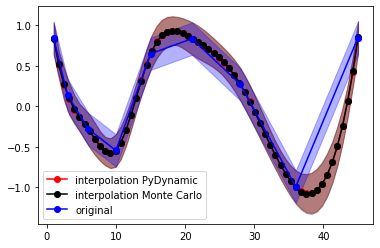

In [13]:
# NBVAL_IGNORE_OUTPUT
# interpolated signal
plt.plot(ti, xi, '-or', label="interpolation PyDynamic")
plt.fill_between(ti, xi + uxi, xi - uxi, color="r", alpha=0.3)
# interpolated signal
plt.plot(ti, x_mc, '-ok', label="interpolation Monte Carlo")
plt.fill_between(ti, x_mc + ux_mc, x_mc - ux_mc, color="k", alpha=0.3)
# original signal
plt.plot(t, x, '-ob', label="original")
plt.fill_between(t, x + ux, x - ux, color="b", alpha=0.3)
plt.legend();

### Numerical

In [9]:
tolerance = 1e-1

In [10]:
np.allclose(xi, x_mc, atol=tolerance, rtol=tolerance)

True

In [11]:
np.allclose(uxi, ux_mc, atol=tolerance, rtol=tolerance)

True